In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import fit, norm, chisquare, goodness_of_fit, lognorm, t,beta, cosine, uniform
from scipy.optimize import curve_fit
from tqdm import tqdm

C:\Users\ioanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_distn_infrastructure.py:1992: RuntimeWarning: overflow encountered in divide
  place(output, cond, self._pdf(*goodargs) / scale)


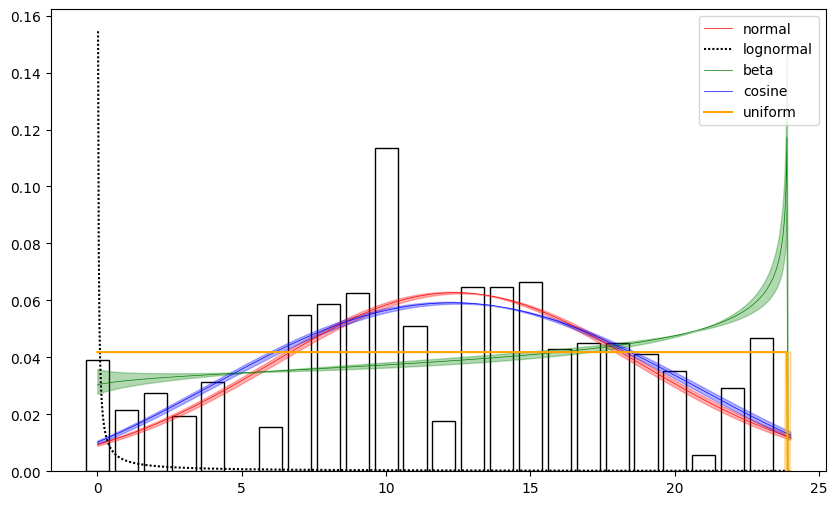

: 

In [55]:



totals = pd.DataFrame(np.arange(0,24,1),columns=['Bin Number'])
for i in range(1,11):
    tempdf = pd.read_csv('totals_asc'+str(i)+'.csv')
    totals['Frac_'+str(i)] = tempdf['Frac']
    totals['RDG Count'+str(i)]=tempdf['RDG Count']

fracavgs=np.zeros(24)
rdgavgs=np.zeros(24)

for i in range(1,11):
    fracavgs += totals['Frac_'+str(i)]
    rdgavgs += totals['RDG Count'+str(i)]
fracavgs=fracavgs/10
rdgavgs=rdgavgs/10

x=np.linspace(0,24,1000)
fig,ax = plt.subplots(figsize=(10,6))


norm_mean_err = 0.2
norm_dev_err = 0.03
beta_a_err=0.07
beta_b_err=0.05
beta_c_err=0.3
beta_d_err=0.3
cosine_a_err=0.2
cosine_b_err=0.03

ax.bar(totals['Bin Number'],rdgavgs/sum(rdgavgs),color='white',edgecolor='black')

ax.plot(x,norm.pdf(x,12.4,6.36),color='red',label='normal',linewidth=0.5)
ax.fill_between(x,norm.pdf(x,12.4-norm_mean_err,6.36-norm_dev_err),
                norm.pdf(x,12.4+norm_mean_err,6.36+norm_dev_err),color='red',alpha=0.3)

ax.plot(x,lognorm.pdf(x,107.14,-5e-324,4.647e-06),color='black',linestyle='dashed',dashes=(1,1),label='lognormal')

ax.plot(x,beta.pdf(x,1.04,0.83,-0.6,24.5),color='green',label='beta',linewidth=0.5)
ax.fill_between(x,beta.pdf(x,1.04+beta_a_err,0.83+beta_b_err,-0.6-beta_c_err,24.5+beta_d_err),
                beta.pdf(x,1.04-beta_a_err,0.83-beta_b_err,-0.6+beta_c_err,24.5-beta_d_err),
                color='green',alpha=0.3)


ax.plot(x,cosine.pdf(x,12.3,5.38),color='blue',label='cosine',linewidth=0.5)
ax.fill_between(x,cosine.pdf(x,12.3+cosine_a_err,5.38+cosine_b_err),
                cosine.pdf(x,12.3-cosine_a_err,5.38-cosine_b_err),color='blue',alpha=0.3)

ax.plot(x,uniform.pdf(x,0,23.9),label='uniform',color='orange')
ax.fill_between(x,uniform.pdf(x,24,24),uniform.pdf(x,23.8,23.8),
                                color='orange',alpha=0.3)


#ax.set_ylim(0,0.065)
ax.legend(fontsize=10)
plt.show()